In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninsta

In [ ]:
import random
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(fashion_mnist)
type(train_images)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>


numpy.ndarray

In [ ]:
print(len(train_images))

60000


In [ ]:
print(train_images[0].shape)
#28 pixels height and width

(28, 28)


In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

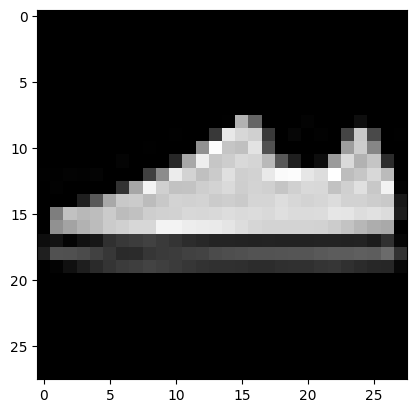

In [ ]:
plt.imshow(train_images[6],cmap='gray')
plt.show()

In [ ]:
print(train_labels[6])

7


In [ ]:
#Normalize pixel values to be between 0 and 1
train_images,test_images=train_images/255.0,test_images/255.0
#change in gradient will be standard if between 0 and 1

In [ ]:
#Reshape images to specify that it's a single channel (grayscale)
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))
#1-gray scale

In [ ]:
#CNN
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
#Add dense layer on top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))#always use number of classes in the data

In [ ]:
#compile and train the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#SparseCategorical is used when 1 one encoding is not done.


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting train_images into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42
)

# Train the model using the new validation set
history = model.fit(
    train_images, train_labels, epochs=5,
    validation_data=(val_images, val_labels)
)


Epoch 1/5
1688/1688 [==============================] - 60s 35ms/step - loss: 0.5013 - accuracy: 0.8181 - val_loss: 0.3611 - val_accuracy: 0.8693
Epoch 2/5
1688/1688 [==============================] - 56s 33ms/step - loss: 0.3277 - accuracy: 0.8825 - val_loss: 0.3029 - val_accuracy: 0.8888
Epoch 3/5
1688/1688 [==============================] - 59s 35ms/step - loss: 0.2809 - accuracy: 0.8966 - val_loss: 0.2817 - val_accuracy: 0.8940
Epoch 4/5
1688/1688 [==============================] - 55s 33ms/step - loss: 0.2507 - accuracy: 0.9064 - val_loss: 0.2785 - val_accuracy: 0.8958
Epoch 5/5
1688/1688 [==============================] - 56s 33ms/step - loss: 0.2223 - accuracy: 0.9180 - val_loss: 0.2532 - val_accuracy: 0.9105


In [ ]:
print(history.history)

{'loss': [0.50125652551651, 0.32771173119544983, 0.28091806173324585, 0.2506568431854248, 0.2222675085067749], 'accuracy': [0.8181111216545105, 0.8825185298919678, 0.8966296315193176, 0.906425952911377, 0.9179629683494568], 'val_loss': [0.36112356185913086, 0.30293142795562744, 0.28167715668678284, 0.2784503698348999, 0.25324520468711853], 'val_accuracy': [0.8693333268165588, 0.8888333439826965, 0.8939999938011169, 0.8958333134651184, 0.9104999899864197]}


In [ ]:
#Evaluate model
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\n Test Accuracy:',test_acc)

313/313 - 2s - loss: 0.2640 - accuracy: 0.9067 - 2s/epoch - 8ms/step

 Test Accuracy: 0.9067000150680542


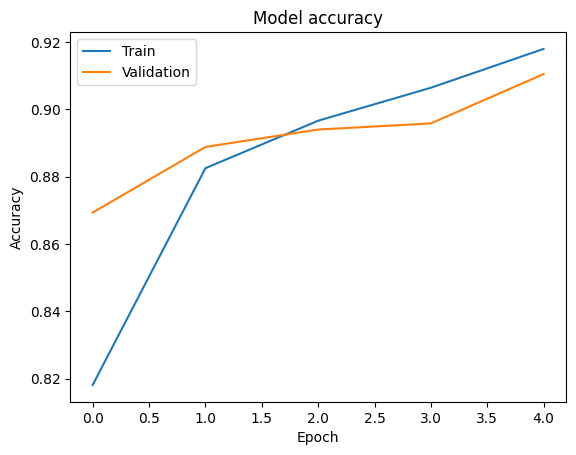

In [ ]:
#Plot training and validation values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


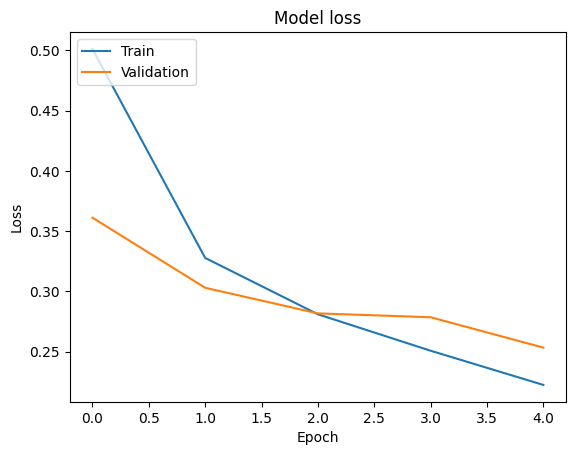

In [ ]:
#Plot training and validation values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


In [ ]:
model.save('trained_fashion_mnist_model.h5')